# Loading File (23-Nov-2016)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
#from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
import seaborn as sns
pd.options.mode.chained_assignment = None
import matplotlib
matplotlib.style.use('ggplot')

#Getting data
tweets = pd.read_csv('C:/Users/mohinder/Data Analysis and M.Learning/demonetization-tweets.csv', encoding = "ISO-8859-1")
tweets.head(3)

,Unnamed: 0,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,23-11-2016 18:40,False,NaN,8.014960e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,23-11-2016 18:40,False,NaN,8.014960e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,23-11-2016 18:40,False,NaN,8.014960e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False


# Filtering Text

In [3]:
import re
#Preprocessing del RT @blablabla:
tweets['text_new'] = ''
tweets['tweetos'] = '' 

#add tweetos first part
for i in range(len(tweets['text'])):
    try:
        tweets['tweetos'][i] = tweets['text'].str.split(':')[i][0]
    except AttributeError:    
        tweets['tweetos'][i] = 'other'

#Preprocessing tweetos. select tweetos contains 'RT @'
for i in range(len(tweets['text'])):
    if tweets['tweetos'].str.contains('RT @')[i]  == False:
        tweets['tweetos'][i] = 'other'

#'text_new' is the feature 'text' without the tweetos    
for i in range(len(tweets['text'])):
    m = re.search('(?<=:)(.*)', tweets['text'][i])
    if tweets['text'].str.contains('RT @')[i]  == True:
        try:
            tweets['text_new'][i]=m.group(0)
        except AttributeError:
            tweets['text_new'][i]=tweets['text'][i] 
    else:       
        tweets['text_new'][i] =  tweets['text'][i] 

tweets.head(3)

,Unnamed: 0,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,text_new,tweetos
0,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,23-11-2016 18:40,False,NaN,8.014960e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False,Critical question: Was PayTM informed about #...,RT @rssurjewala
1,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,23-11-2016 18:40,False,NaN,8.014960e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False,Did you vote on #Demonetization on Modi surve...,RT @Hemant_80
2,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,23-11-2016 18:40,False,NaN,8.014960e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False,"Former FinSec, RBI Dy Governor, CBDT Chair + ...",RT @roshankar


# Tweets Recorded Per Hour

In [1]:
tweets['nb_words'] = 0
for i in range(len(tweets['text'])):
    tweets['nb_words'][i] = len(tweets['text'][i].split(' '))
tweets['hour'] = pd.DatetimeIndex(tweets['created']).hour
tweets['date'] = pd.DatetimeIndex(tweets['created']).date
tweets['minute'] = pd.DatetimeIndex(tweets['created']).minute
tweets_hour = tweets.groupby(['hour'])['retweetCount'].sum()
tweets_minute = tweets.groupby(['minute'])['retweetCount'].sum()
print(tweets_hour.index)

NameError: name 'tweets' is not defined

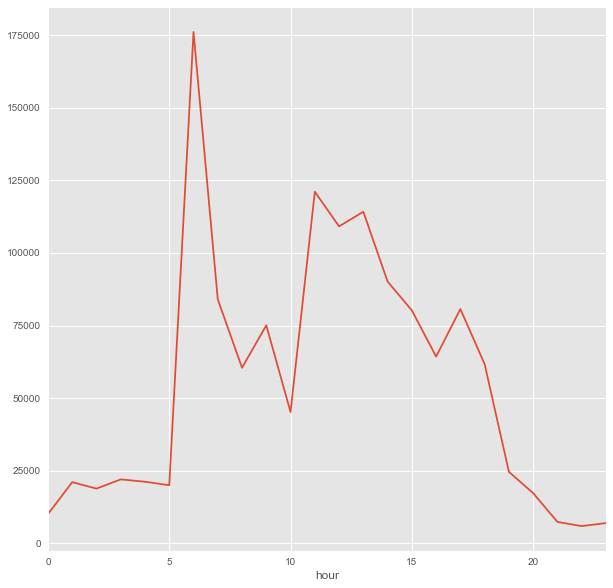

In [5]:
tweets_hour.plot(kind='line',figsize=(10, 10))

# Source Of Tweets

In [6]:
tweets['statusSource_new'] = ''

for i in range(len(tweets['statusSource'])):
    m = re.search('(?<=>)(.*)', tweets['statusSource'][i])
    try:
        tweets['statusSource_new'][i]=m.group(0)
    except AttributeError:
        tweets['statusSource_new'][i]=tweets['statusSource'][i]
        
#print(tweets['statusSource_new'].head())   

tweets['statusSource_new'] = tweets['statusSource_new'].str.replace('</a>', ' ', case=False)


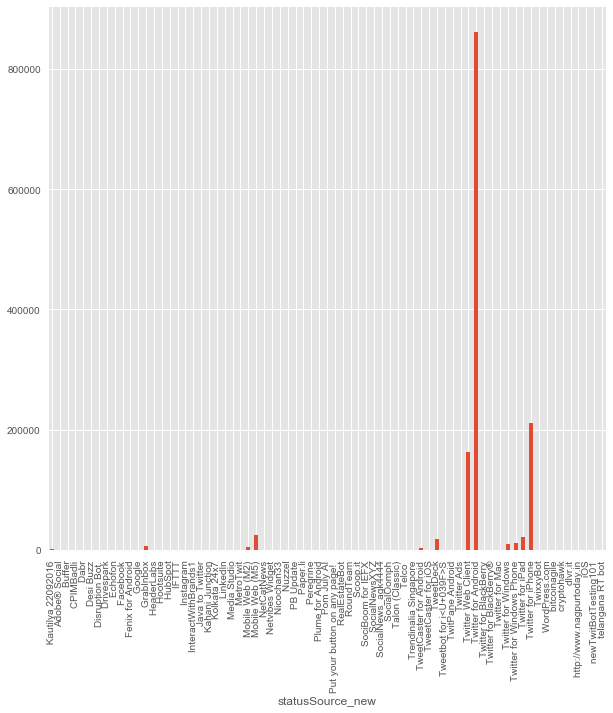

In [7]:
tweets_by_type= tweets.groupby(['statusSource_new'])['retweetCount'].sum()
tweets_by_type.plot(kind='bar',figsize=(10, 10))


In [10]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

# Lemmatizing Sentences

In [8]:
from nltk.stem import WordNetLemmatizer
#tweets['text_sep'] = [''.join(z).strip() for z in tweets['text_new']]
tweets['text_lem'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line),pos="a") for line in lists]).strip() for lists in tweets['text_new']]
tweets.head()

,Unnamed: 0,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,...,isRetweet,retweeted,text_new,tweetos,nb_words,hour,date,minute,statusSource_new,text_lem
0,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,23-11-2016 18:40,False,NaN,8.014960e+17,NaN,...,True,False,Critical question: Was PayTM informed about #...,RT @rssurjewala,20,18,2016-11-23,40,Twitter for Android,Critical question Was PayTM informed about D...
1,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,23-11-2016 18:40,False,NaN,8.014960e+17,NaN,...,True,False,Did you vote on #Demonetization on Modi surve...,RT @Hemant_80,11,18,2016-11-23,40,Twitter for Android,Did you vote on Demonetization on Modi survey...
2,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,23-11-2016 18:40,False,NaN,8.014960e+17,NaN,...,True,False,"Former FinSec, RBI Dy Governor, CBDT Chair + ...",RT @roshankar,21,18,2016-11-23,40,Twitter for Android,Former FinSec RBI Dy Governor CBDT Chair H...
3,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,23-11-2016 18:39,False,NaN,8.014960e+17,NaN,...,True,False,Gurugram (Haryana): Post office employees pro...,RT @ANI_news,16,18,2016-11-23,39,Twitter for Android,Gurugram Haryana Post office employees prov...
4,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,23-11-2016 18:39,False,NaN,8.014950e+17,NaN,...,True,False,Reddy Wedding! @mail_today cartoon #demonetiz...,RT @satishacharya,9,18,2016-11-23,39,CPIMBadli,Reddy Wedding mail today cartoon demonetiza...


# Plotting Sentiments

In [19]:
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# from nltk.sentiment.util import *
# from nltk import tokenize

# sid = SentimentIntensityAnalyzer()
import sentiment_mod as s
tweets['sentiment_type']=''
# tweets.loc[s.sentiment(tweets.text_lem)=='pos','sentiment_type']='POSITIVE'
# tweets.loc[s.sentiment(tweets.text_lem)=='neg','sentiment_type']='NEGATIVE'
for index,rows in tweets.iterrows():
    if(s.sentiment(rows['text_lem'])=='pos'):
#         print('pos')
        tweets.loc[index,'sentiment_type']='POSITIVE'
    elif(s.sentiment(rows['text_lem'])=='neg'):
#         print('neg')
        tweets.loc[index,'sentiment_type']='NEGATIVE'
tweets.head(5)


,Unnamed: 0,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,...,retweeted,text_new,tweetos,nb_words,hour,date,minute,statusSource_new,text_lem,sentiment_type
0,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,23-11-2016 18:40,False,NaN,8.014960e+17,NaN,...,False,Critical question: Was PayTM informed about #...,RT @rssurjewala,20,18,2016-11-23,40,Twitter for Android,Critical question Was PayTM informed about D...,POSITIVE
1,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,23-11-2016 18:40,False,NaN,8.014960e+17,NaN,...,False,Did you vote on #Demonetization on Modi surve...,RT @Hemant_80,11,18,2016-11-23,40,Twitter for Android,Did you vote on Demonetization on Modi survey...,POSITIVE
2,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,23-11-2016 18:40,False,NaN,8.014960e+17,NaN,...,False,"Former FinSec, RBI Dy Governor, CBDT Chair + ...",RT @roshankar,21,18,2016-11-23,40,Twitter for Android,Former FinSec RBI Dy Governor CBDT Chair H...,NEGATIVE
3,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,23-11-2016 18:39,False,NaN,8.014960e+17,NaN,...,False,Gurugram (Haryana): Post office employees pro...,RT @ANI_news,16,18,2016-11-23,39,Twitter for Android,Gurugram Haryana Post office employees prov...,NEGATIVE
4,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,23-11-2016 18:39,False,NaN,8.014950e+17,NaN,...,False,Reddy Wedding! @mail_today cartoon #demonetiz...,RT @satishacharya,9,18,2016-11-23,39,CPIMBadli,Reddy Wedding mail today cartoon demonetiza...,NEGATIVE


In [56]:
tweets.to_csv("twitter-analysis.csv")

sentiment_type
NEGATIVE    5575
POSITIVE    2425
Name: text, dtype: int64


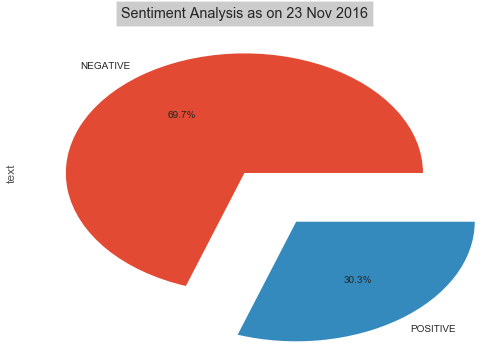

In [55]:
import matplotlib
matplotlib.style.use('ggplot')

tweets_sentiment = tweets.groupby(['sentiment_type']).count()
# type(tweets_sentiment['text'])
print(tweets_sentiment['text'])
df_ = pd.DataFrame(index=['POSITIVE','NEGATIVE'], columns=['COUNT'])
# for count,rows in tweets_sentiment.iterrows():
#     print(rows.index)
#     df_.loc['POSITIVE','COUNT']=rows['text']
explode = (0, 0.5)
plt.title('Sentiment Analysis as on 23 Nov 2016', bbox={'facecolor':'0.8', 'pad':5})
tweets_sentiment['text'].plot(kind="pie",autopct='%1.1f%%' ,explode=explode)
# tweets_sentiment.rename("",inplace=True)
# explode = (0, 0, 1.0)
# plt.subplot(221)
# tweets_sentiment.transpose().plot(kind='barh',figsize=(10, 6))
# plt.title('Sentiment Analysis 1', bbox={'facecolor':'0.8', 'pad':0})
# plt.subplot(222)
# tweets_sentiment.plot(kind='pie',figsize=(10, 6),autopct='%1.1f%%',shadow=True,explode=explode)
# plt.legend(bbox_to_anchor=(1, 1), loc=3, borderaxespad=0.)
# plt.title('Sentiment Analysis 2', bbox={'facecolor':'0.8', 'pad':0})
# plt.show()

In [29]:
print(WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', '$', "#arvind keju this are getting . 2/20 Hii yr"))) #match any character except A-Za-z and will be replaced by $

['$arvind$keju$this$are$getting$$$$$$$$Hii$yr']


# Sentiment Analysis Using Our Own Classification

In [11]:
# neg=1;
# pos=1;
# for ind,x in tweets.iterrows():
#     if x['sentiment_type'] == "NEGATIVE":
#         file_name="/home/kamaljeet/anaconda3/twit_data/neg/neg_"+str(neg)+".txt"
#         neg+=1
#         f=open(file_name,'w+')
#         f.write(str(x['text_lem']))
#         f.close()
#     elif x['sentiment_type'] == "POSITIVE":
#         file_name="/home/kamaljeet/anaconda3/twit_data/pos/pos_"+str(pos)+".txt"
#         pos+=1
#         f=open(file_name,'w+')
#         f.write(str(x['text_lem']))
#         f.close()

In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [8]:
import os
import random
import nltk
from nltk.tokenize import word_tokenize
# from nltk.corpus import CategorizedPlaintextCorpusReader
# twit = CategorizedPlaintextCorpusReader('/home/kamaljeet/anaconda3/twit_data/', r'(?!\.).*\.txt', cat_pattern=r'(neg|pos)/.*')

# documents = [(list(twit.words(fileid)),category)
#             for category in twit.categories() 
#             for fileid in twit.fileids(category)]

# random.shuffle(documents)

# all_words=[]
# for w in twit.words():
#     all_words.append(w.lower())

# all_words = nltk.FreqDist(all_words)
# word_features = list(all_words.keys())[:2000]
short_pos = open("C:/Users/mohinder/twit/pos_dem.txt","r",encoding='utf-8').read()
short_neg = open("C:/Users/mohinder/twit/neg_dem.txt","r",encoding='utf-8').read()

documents = []

for r in short_pos.split('\n'):
    documents.append( (r, "pos") )

for r in short_neg.split('\n'):
    documents.append( (r, "neg") )


all_words = []

short_pos_words = word_tokenize(short_pos)
short_neg_words = word_tokenize(short_neg)

for w in short_pos_words:
    all_words.append(w.lower())

for w in short_neg_words:
    all_words.append(w.lower())

all_words = nltk.FreqDist(all_words)
word_features = list(all_words.keys())[:3000]
    
def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

random.shuffle(documents)     
# # print((find_features(twit.words('/home/kamaljeet/anaconda3/twit_data/neg/neg_40.txt'))))



In [9]:
feature_set = [(find_features(rev),category) for (rev, category) in documents]


CLASSIFICATION--

In [10]:
# i=1
# for x in feature_set:
#     print(x)
#     print("\n\n")
#     if(i>5):
#         break
#     i=i+1
random.shuffle(feature_set)
print(len(feature_set))
train_set = feature_set[:5000]
test_set = feature_set[5000:]

classifier = nltk.NaiveBayesClassifier.train(train_set)
print("Naive Bayes Accuracy:", (nltk.classify.accuracy(classifier, test_set)*100))
classifier.show_most_informative_features(30)

5755
Naive Bayes Accuracy: 86.75496688741721
Most Informative Features
                   happy = True              pos : neg    =     65.5 : 1.0
                    best = True              pos : neg    =     42.4 : 1.0
                    bond = True              pos : neg    =     23.9 : 1.0
                   gains = True              pos : neg    =     21.5 : 1.0
                   piece = True              pos : neg    =     19.3 : 1.0
                increase = True              pos : neg    =     16.7 : 1.0
                 winning = True              pos : neg    =     16.7 : 1.0
                     try = True              pos : neg    =     16.7 : 1.0
                praising = True              pos : neg    =     14.1 : 1.0
                security = True              pos : neg    =     14.1 : 1.0
               long-term = True              pos : neg    =     14.1 : 1.0
                    team = True              pos : neg    =     13.8 : 1.0
                 despite = Tr

In [26]:
classifier.classify({'welcomes':'false'})

'neg'

SCIKIT-LEARN INCORPORATION--

In [11]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC,LinearSVC,NuSVC
MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(train_set)
print("MNB_classifier Accuracy:", (nltk.classify.accuracy(MNB_classifier, test_set)*100))

MNB_classifier Accuracy: 87.15231788079471


In [12]:
BernoulliNB_classifier = SklearnClassifier(BernoulliNB())
BernoulliNB_classifier.train(train_set)
print("BernoulliNB_classifier Accuracy:", (nltk.classify.accuracy(BernoulliNB_classifier, test_set)*100))

BernoulliNB_classifier Accuracy: 85.6953642384106


In [13]:
LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(train_set)
print("LogisticRegression classifier Accuracy:", (nltk.classify.accuracy(LogisticRegression_classifier, test_set)*100))

LogisticRegression classifier Accuracy: 86.6225165562914


In [14]:
SGDClassifier_classifier = SklearnClassifier(SGDClassifier())
SGDClassifier_classifier.train(train_set)
print("SGDClassifier classifier Accuracy:", (nltk.classify.accuracy(SGDClassifier_classifier, test_set)*100))

SGDClassifier classifier Accuracy: 85.2980132450331


In [15]:
SVC_classifier = SklearnClassifier(SVC())
SVC_classifier.train(train_set)
print("SVCClassifier classifier Accuracy:", (nltk.classify.accuracy(SVC_classifier, test_set)*100))

SVCClassifier classifier Accuracy: 80.39735099337749


In [16]:
LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(train_set)
print("LinearSVC classifier Accuracy:", (nltk.classify.accuracy(LinearSVC_classifier, test_set)*100))

LinearSVC classifier Accuracy: 87.54966887417218


In [10]:
print(len(feature_set))

10664


COMBINING ALGO WITH A VOTE TO SELECT THE BEST CLASSIFIER--

In [17]:
from nltk.classify import ClassifierI
from statistics import mode
class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers
        
    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)
    
    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)

        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        return conf

voted_classifier = VoteClassifier(classifier,MNB_classifier,BernoulliNB_classifier,LogisticRegression_classifier,
                                 SGDClassifier_classifier,SVC_classifier,LinearSVC_classifier)
print("Voted_Classifier Accuracy:", (nltk.classify.accuracy(voted_classifier, test_set))*100)

Voted_Classifier Accuracy: 87.01986754966887


SAVING WITH PICKLE--

In [18]:
import pickle
save_classifier=open("naivebayes.pickle","wb")
pickle.dump(classifier,save_classifier)
save_classifier.close()

save_classifier=open("MNB_classifier.pickle","wb")
pickle.dump(MNB_classifier,save_classifier)
save_classifier.close()

save_classifier=open("BernoulliNB_classifier.pickle","wb")
pickle.dump(BernoulliNB_classifier,save_classifier)
save_classifier.close()

save_classifier=open("LogisticRegression_classifier.pickle","wb")
pickle.dump(LogisticRegression_classifier,save_classifier)
save_classifier.close()

save_classifier=open("SGDClassifier_classifier.pickle","wb")
pickle.dump(SGDClassifier_classifier,save_classifier)
save_classifier.close()

save_classifier=open("SVC_classifier.pickle","wb")
pickle.dump(SVC_classifier,save_classifier)
save_classifier.close()

save_classifier=open("LinearSVC_classifier.pickle","wb")
pickle.dump(LinearSVC_classifier,save_classifier)
save_classifier.close()

save_documents = open("documents.pickle","wb")
pickle.dump(documents, save_documents)
save_documents.close()

save_word_features = open("word_features.pickle","wb")
pickle.dump(word_features, save_word_features)
save_word_features.close()

save_features = open("feature_set.pickle","wb")
pickle.dump(feature_set, save_features)
save_features.close()